## Intro
In this lab I will work with house plants information from the House Plants API, in order to create some visualizations with the data obtained.

## Import libraries

In [1]:
# !pip install squarify

import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Load data 

In [2]:
url = "https://house-plants2.p.rapidapi.com/all-lite"

headers = {
	"X-RapidAPI-Key": "b82109388cmshe368abf57775293p109541jsn985b2de713ee",
	"X-RapidAPI-Host": "house-plants2.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

r_json = response.json()

In [3]:
plant_data = pd.DataFrame(r_json)
plant_data

,Categories,Common name (fr.),Img,Family,Latin name,Description,Origin,Zone,Common name,Other names,id,Climat
0,Dracaena,Janet Craig,http://www.tropicopia.com/house-plant/thumbnai...,Liliaceae,Dracaena deremensis 'Janet Craig',None,[Cultivar],[11-10],[Janet Craig],None,53417c12-4824-5995-bce0-b81984ebbd1d,Tropical
1,Palm,None,http://www.tropicopia.com/house-plant/thumbnai...,Arecaceae,Rhapis excelsa,None,[China],"[11, 9]",[Lady palm],Rhapis flabelliformis,9b97aef1-20a4-5620-af90-7d64dadb414e,Subtropical
2,Anthurium,"Flamant rose, Langue de feu",http://www.tropicopia.com/house-plant/thumbnai...,Araceae,Anthurium X,None,[Cultivar],[11],"[Tailflower, Wax flower]",None,215b33f4-66d2-5601-b776-4501f2bd50b7,Tropical
3,Other,Oreille d'lphant,http://www.tropicopia.com/house-plant/thumbnai...,Araceae,Alocasia X amazonica,None,[Hybrid],[11],[Elephant ear],(A. sanderiana x A. lowii grandis),55a0e4fa-0717-521d-9671-0fc9095f2055,Tropical humid
4,Dracaena,Dracaena de Malaisie,http://www.tropicopia.com/house-plant/thumbnai...,Liliaceae,Dracaena reflexa 'Song of Jamaica',None,[Cultivar],[11-10],[Malaysian Dracaena],Pleomele reflexa,99596292-0712-5d51-8b94-669d621c504a,Tropical
...,...,...,...,...,...,...,...,...,...,...,...,...
350,Aglaonema,Aglaonema,http://www.tropicopia.com/house-plant/thumbnai...,Araceae,Aglaonema 'Marguerita',None,[Hybrid],[11],[Chinese Evergreen],None,acdf7584-020e-51cd-9592-71a6c1b05616,Tropical
351,Aglaonema,Aglaonema,http://www.tropicopia.com/house-plant/thumbnai...,Araceae,Aglaonema 'Painted Princess',None,[Hybrid],[11],[Chinese Evergreen],None,f394aa12-de94-5714-85a3-6abf4e23401b,Tropical
352,Foliage plant,Caltha argent,http://www.tropicopia.com/house-plant/thumbnai...,Marantaceae,Calathea pictura 'Argentea',None,[Cultivar],[12],[Silver Calathea],None,8db3d134-7bfb-52f8-affd-c759c739c8e5,Tropical
353,Ficus,Plante caoutchouc,http://www.tropicopia.com/house-plant/thumbnai...,Moraceae,Ficus elastica 'Robusta',None,[Cultivar],[11-10],[Rubber plant],None,6edd069d-6a56-5c02-86bb-a190a515be63,Tropical


## Visualizations
#### Family

In [4]:
family = pd.DataFrame(plant_data["Family"])
family

,Family
0,Liliaceae
1,Arecaceae
2,Araceae
3,Araceae
4,Liliaceae
...,...
350,Araceae
351,Araceae
352,Marantaceae
353,Moraceae


In [5]:
# Since there are too many categories, group the families with less than 5 species in "Other"

condition = family["Family"].map(family["Family"].value_counts()) < 5
family["Family"] =  family["Family"].mask(condition, "Other")
family.value_counts()

Family        
Araceae           97
Liliaceae         57
Other             49
Araliaceae        43
Arecaceae         26
Moraceae          23
Bromeliaceae      19
Euphorbiaceae     10
Marantaceae       10
Cactaceae          6
Amaryllidaceae     5
Apocynaceae        5
Crasssulaceae      5
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Family'>

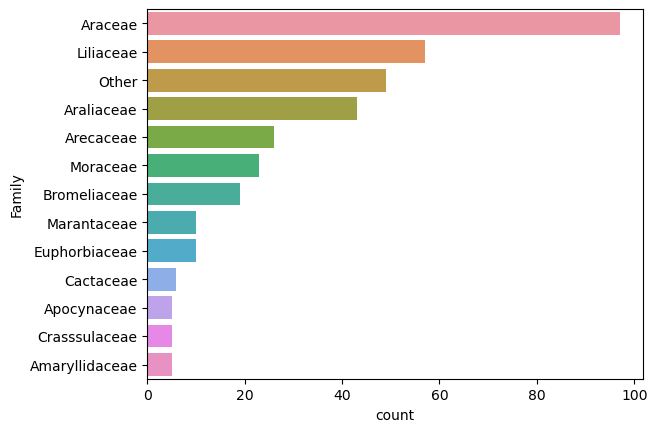

In [6]:
sns.countplot(y = family["Family"], 
             order = family["Family"].value_counts().index)

#### Climate

In [7]:
plant_data["Climat"].value_counts()

Tropical                   264
Subtropical                 40
Tropical humid              24
Arid Tropical               24
Subtropical arid             2
Tropical to subtropical      1
Name: Climat, dtype: int64

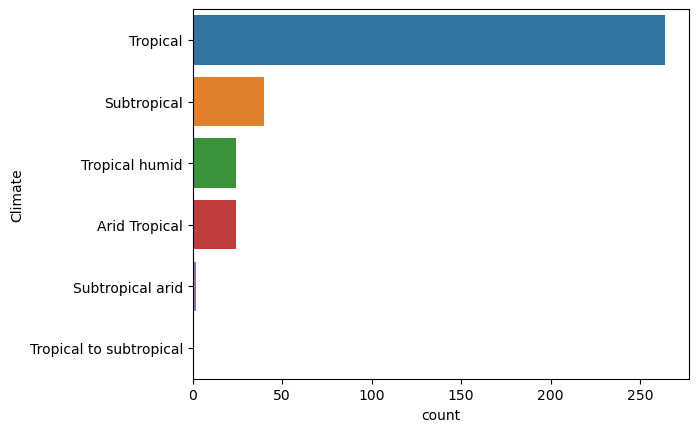

In [8]:
sns.countplot(y = plant_data["Climat"], 
             order = plant_data["Climat"].value_counts().index)

plt.ylabel("Climate")

plt.show()

#### Categories 

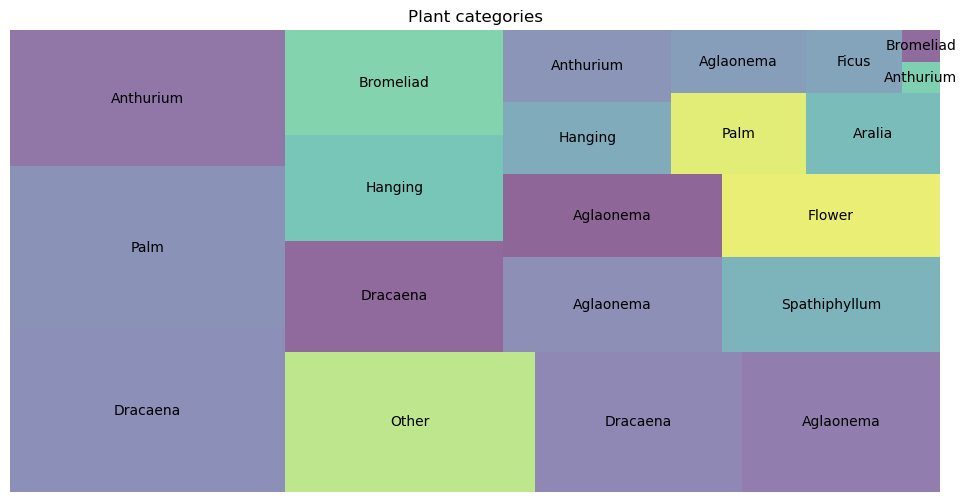

In [9]:
sizes = plant_data["Categories"].value_counts() # proportions of the categories
label = plant_data["Categories"]
fig = plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title="Plant categories")
plt.axis('off')
plt.show()